**Clasificacion Basica: Predecir una imagen de moda**

from https://www.tensorflow.org/tutorials/keras/classification

**1.- Importar TensorFlow y tf.keras y librerias**

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


**2.- Capturar datos**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


**3.- Explorar el set de datos**

In [5]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


**4.- Pre-procesa el set de datos, 1era imagen del set de entrenamiento**

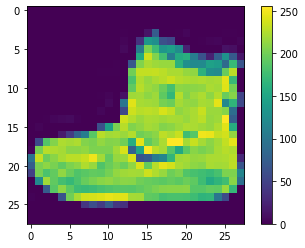

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**5.- Escalar entre valores 0 y 1 (normalizar)**

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**6.- Primera imagenes en formato adecuado**

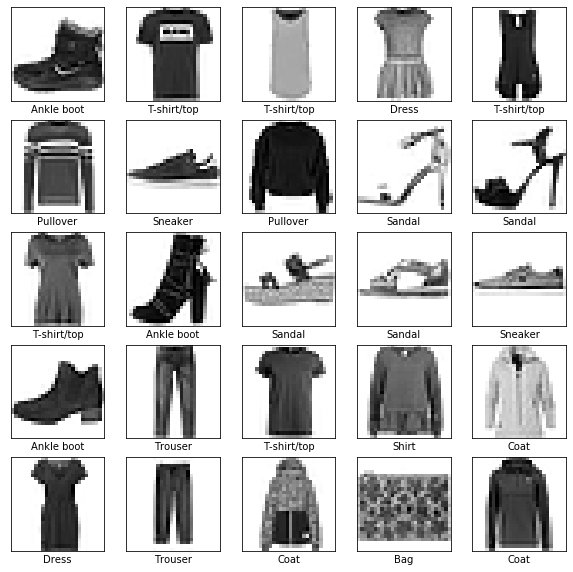

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**7.- Construir el Modelo**

**7.1- Configurar las Capas**

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles)
    keras.layers.Dense(128, activation='relu'), #La primera capa Dense tiene 128 nodos (o neuronas)
    keras.layers.Dense(10, activation='softmax') #capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1
])

**7.- Construir el Modelo**

**7.2.- Compile el modelo**
#Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
#Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
#Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. En el ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**8.- Entrenar el Modelo**

In [11]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5011 - accuracy: 0.8243

**9.- Evaluar Exactitud**

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3384 - accuracy: 0.8826

Test accuracy: 0.8826


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a overfitting (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.



**10.- Hacer predicciones**

In [13]:
predictions = model.predict(test_images)
print(predictions[0]) #primera prediccion

[1.7213828e-06 3.5521486e-09 2.0162461e-10 1.7605745e-10 2.7631992e-09
 8.0831896e-04 1.1885835e-07 4.2652790e-03 3.0526760e-07 9.9492419e-01]


una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes
de cada uno de los 10 articulos de moda/ropa.
Pueden revisar cual tiene el nivel mas alto de confianza:


In [14]:
print(np.argmax(predictions[0]))

9


Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o class_names[9]. Examinando
las etiquetas de test o de pruebas muestra que esta clasificaion es correcta:


In [15]:
print(test_labels[0])


9


**Grafique esto para poder ver todo el set de la prediccion de las 10 clases.**

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0] y [12], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan
en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

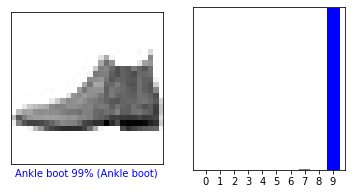

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

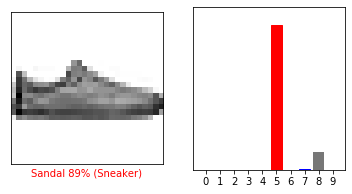

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

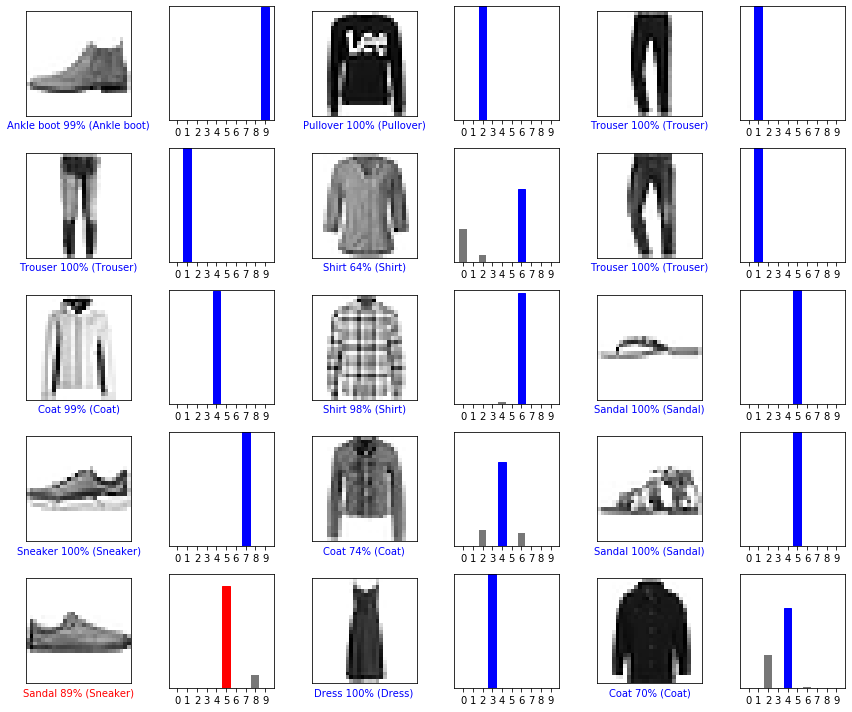

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

(28, 28)
(1, 28, 28)
[[2.94358877e-04 1.55206224e-13 9.99501109e-01 2.28074989e-10
  9.34687996e-05 4.64444997e-13 1.11071284e-04 1.68161896e-15
  1.66828232e-10 1.22836446e-11]]
2


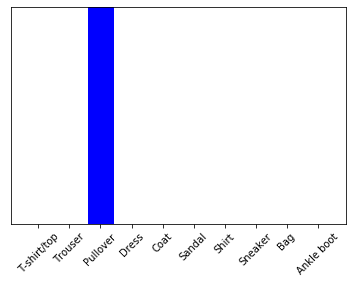

In [20]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
print(np.argmax(predictions_single[0]))

Y el modelo predice una etiqueta de 2.
